In [ ]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv('/content/drive/MyDrive/MonU/MidTerm/netflix_titles.csv')

except ModuleNotFoundError:
    try:
        df = pd.read_csv('netflix_titles.csv')
    except FileNotFoundError:
        print("Check csv Location")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Check for Missing and Duplicated Data

Number of missing values in director is 2634
Number of missing values in cast is 825
Number of missing values in country is 831
Number of missing values in date_added is 10
Number of missing values in rating is 4
Number of missing values in duration is 3
Total Number of missing values is 4307


0 rows are duplicated




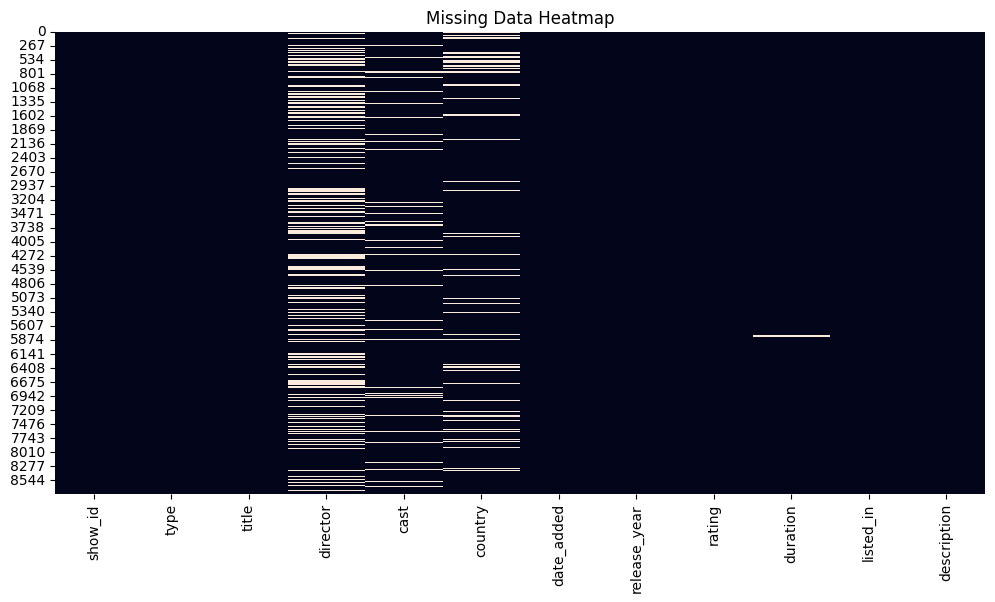

In [ ]:
#print(df.describe())
def check_missing(df):
  for i in df.columns:
    if df[i].isnull().sum() != 0:
      print(f"Number of missing values in {i} is {df[i].isnull().sum().sum()}")
  print(f"Total Number of missing values is {df.isnull().sum().sum()}")
  print('\n')
  print(f"{df.duplicated().sum()} rows are duplicated")
  print('\n')

  plt.figure(figsize=(12,6))
  sns.heatmap(df.isnull(), cbar=False)
  plt.title('Missing Data Heatmap')
  plt.show()

check_missing(df)

# Handling Missing Data

<ipython-input-5-a8963021d875>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Not Specified', inplace=True)
<ipython-input-5-a8963021d875>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Number of missing values in date_added is 10
Number of missing values in rating is 4
Number of missing values in duration is 3
Total Number of missing values is 17


0 rows are duplicated




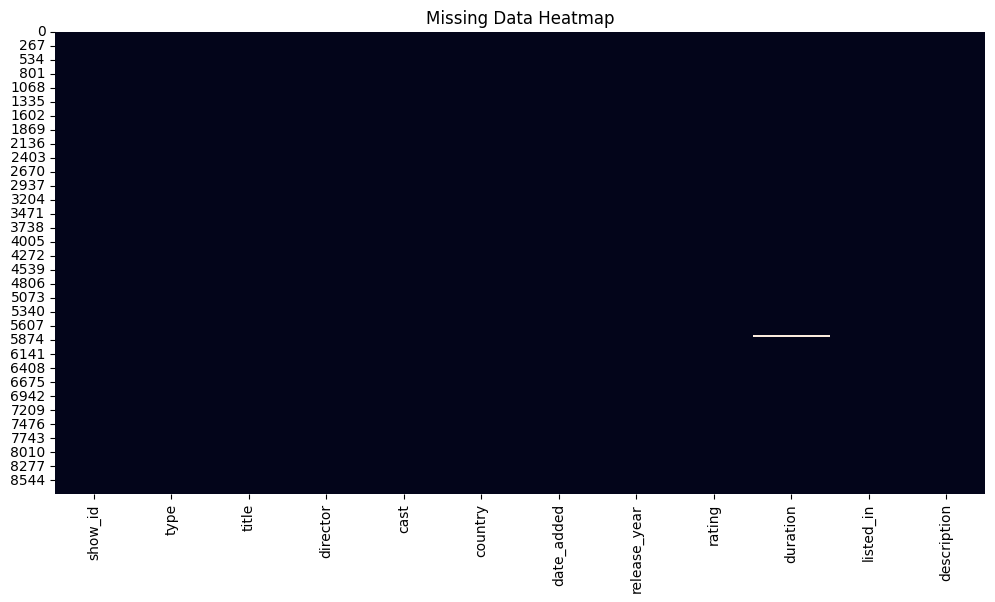

In [ ]:
# Replace missing values
df['director'].fillna('Not Specified', inplace=True)
df['cast'].fillna('Not Specified', inplace=True)
df['country'].fillna('Unknown', inplace=True)

#df['director'] = df['director'].fillna('Not Specified')

# Drop rows with missing 'date_added'
#df.dropna(subset=['date_added'], inplace=True)

check_missing(df)


# Data Cleaning and Data Prep

In [ ]:
print(f"There are {len(df.columns)} columns in the dataset")
print(f"There are {len(df)} rows in the dataset")
print(df.dtypes)

There are 12 columns in the dataset
There are 8807 rows in the dataset
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [ ]:
# Date Formatting
# Step 1: Strip leading/trailing spaces in the date column
try:
  df['date_added'] = df['date_added'].str.strip()
except AttributeError:
  pass

# Step 2: Convert to datetime with the desired format
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['month_year'] = df['date_added'].dt.to_period('M')
df['month_added'] = df['date_added'].dt.strftime('%B')
df['day_added'] = df['date_added'].dt.strftime('%A')
df['year_added'] = df['date_added'].dt.year

#Confirming the datatype change
print(df['date_added'].dtypes)
print(df.dtypes)

datetime64[ns]
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
month_year           period[M]
month_added             object
day_added               object
year_added             float64
dtype: object


In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_year,month_added,day_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09,September,Saturday,2021.0
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09,September,Friday,2021.0


In [ ]:
# List of columns to analyze
qualitative_data = ['type', 'director', 'cast', 'country', 'release_year', 'rating', 'duration', 'listed_in',
                    'month_added', 'day_added', 'year_added', ]

# Columns that need splitting and exploding
columns_to_split = ['director', 'cast', 'country', 'listed_in']

# Initialize dictionaries
qualitative_data_df = {}
qualitative_data_counts = {}

# Iterate over each column
for col in qualitative_data:
    # Convert to string to avoid issues with NaN or other types
    df[col] = df[col].astype(str)

    # Check if the column needs to be split and exploded
    if col in columns_to_split:
        # Split the string into a list
        df[col] = df[col].str.split(', ')
        # Explode the DataFrame to have one value per row
        temp_df = df.explode(col)
    else:
        # No need to split; use the original DataFrame
        temp_df = df.copy()

    # Store the exploded or original DataFrame in the dictionary
    qualitative_data_df[col] = temp_df

    # Get the value counts for the column
    qualitative_data_counts[col] = temp_df[col].value_counts().head(20)

# Now, qualitative_data_df and qualitative_data_counts are dictionaries
# You can access them using the column names


# Print the results
print(qualitative_data_counts['cast'])

cast
Not Specified        825
Anupam Kher           43
Shah Rukh Khan        35
Julie Tejwani         33
Naseeruddin Shah      32
Takahiro Sakurai      32
Rupa Bhimani          31
Akshay Kumar          30
Om Puri               30
Yuki Kaji             29
Amitabh Bachchan      28
Paresh Rawal          28
Boman Irani           27
Vincent Tong          26
Rajesh Kava           26
Kareena Kapoor        25
Andrea Libman         25
John Cleese           24
Samuel L. Jackson     24
Jigna Bhardwaj        23
Name: count, dtype: int64


# Distribution

In [ ]:
# Bar chart
chat_dict = {}

for i, key in enumerate(qualitative_data_counts):
    # For each category, add an entry to the dictionary
    print(key)
    #print(len(qualitative_data_counts[i]))
    chat_dict[key] = [f'Top {len(qualitative_data_counts[key])} {key.capitalize()}', qualitative_data_counts[key]]

type
director
cast
country
release_year
rating
duration
listed_in
month_added
day_added
year_added


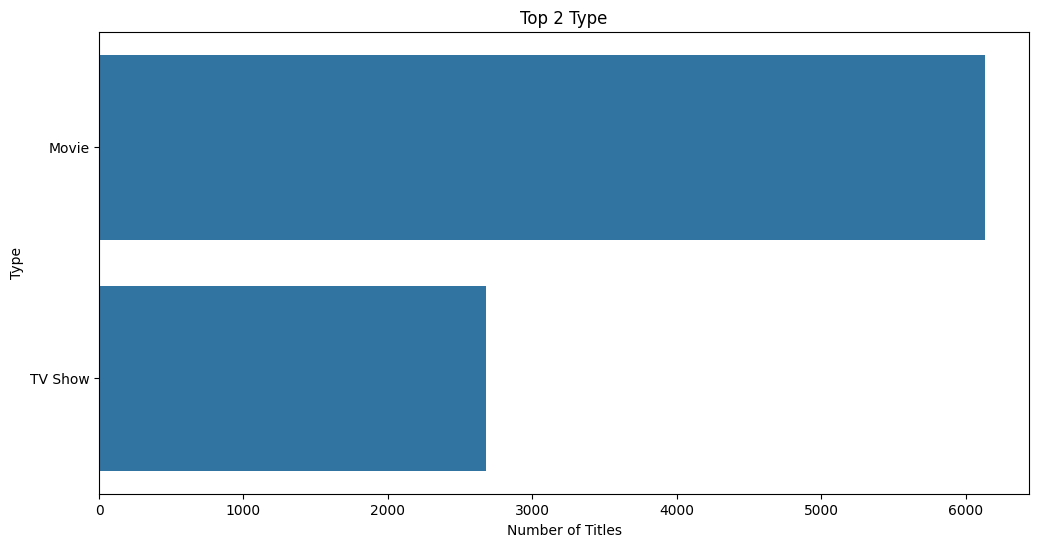

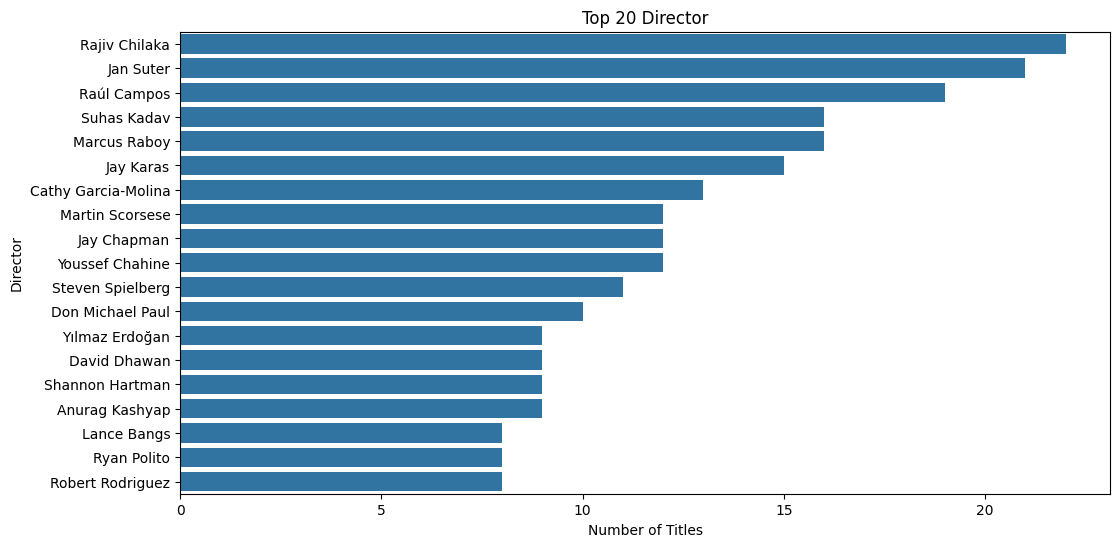

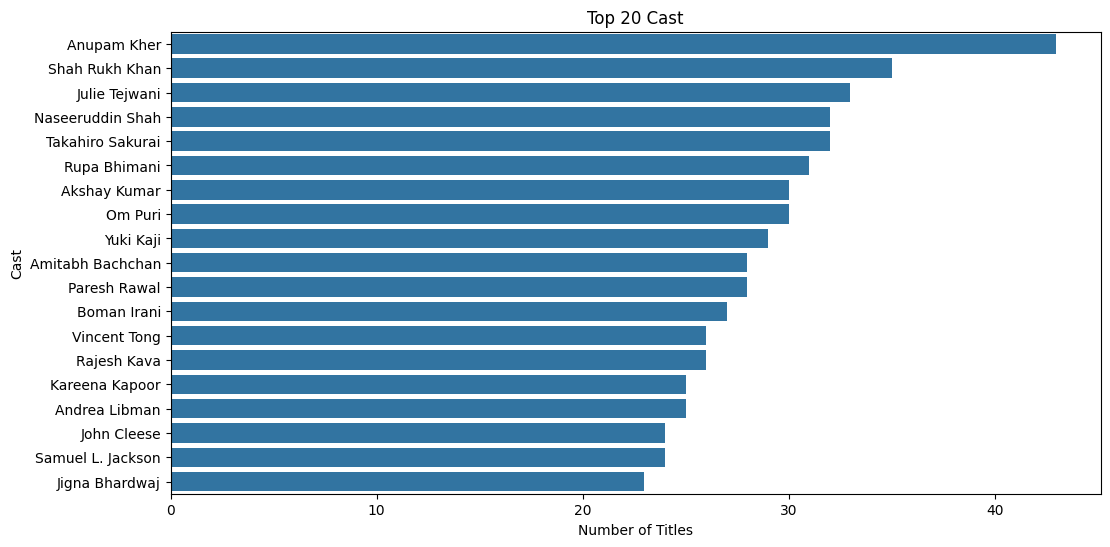

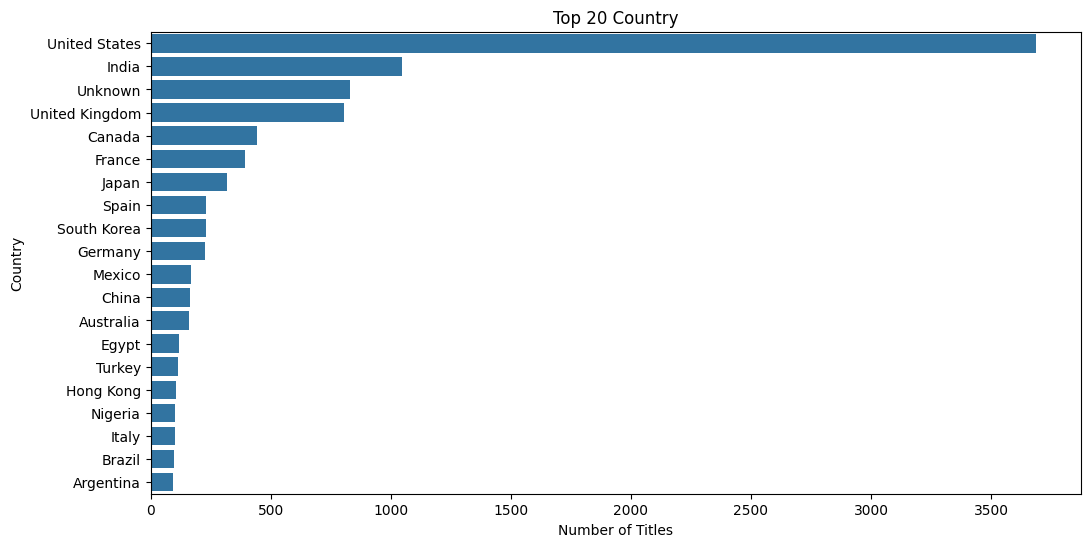

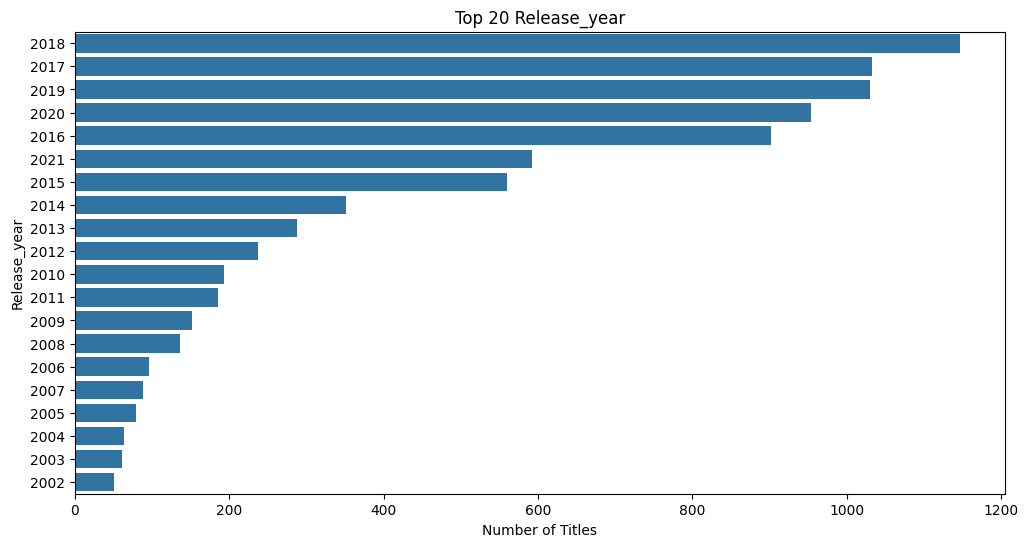

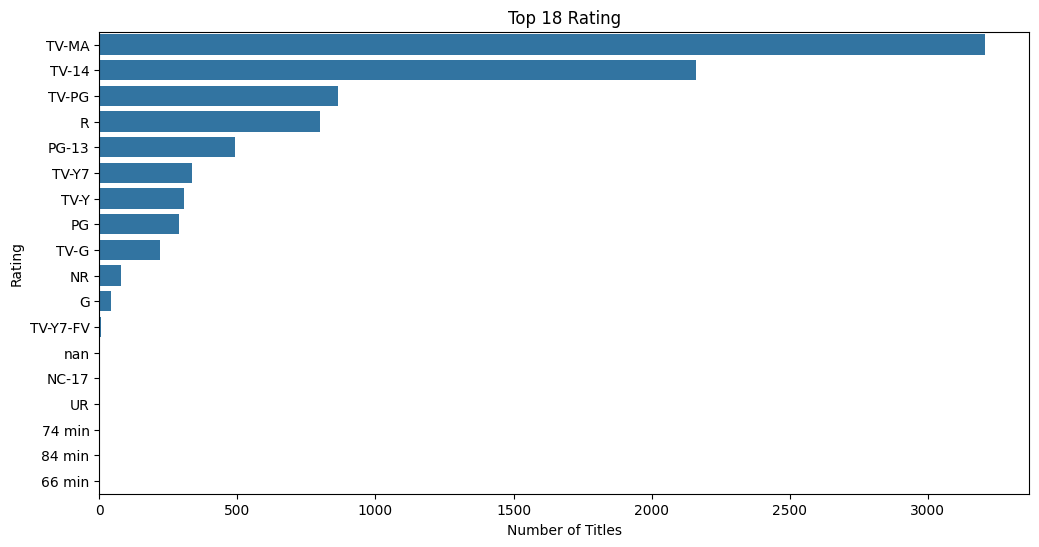

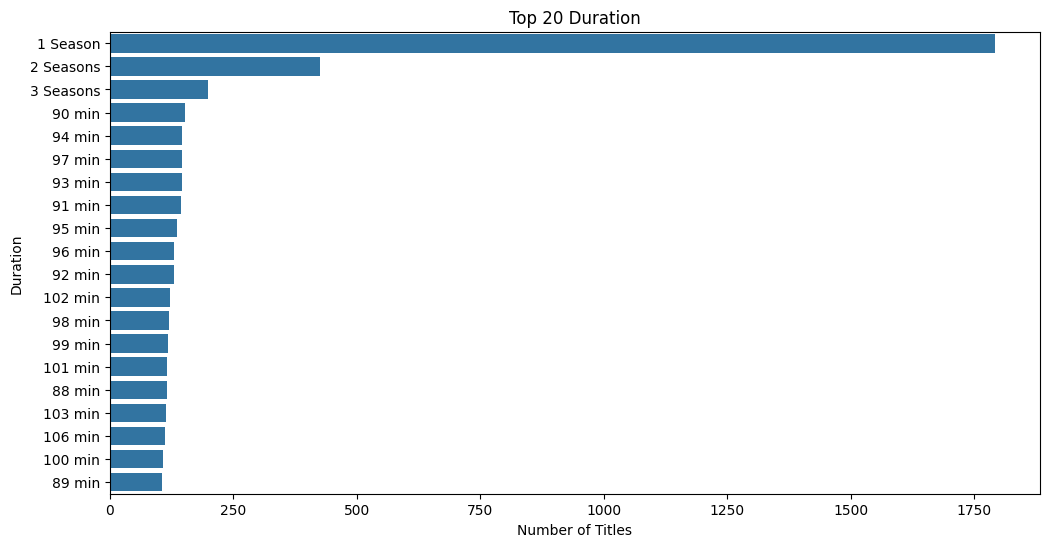

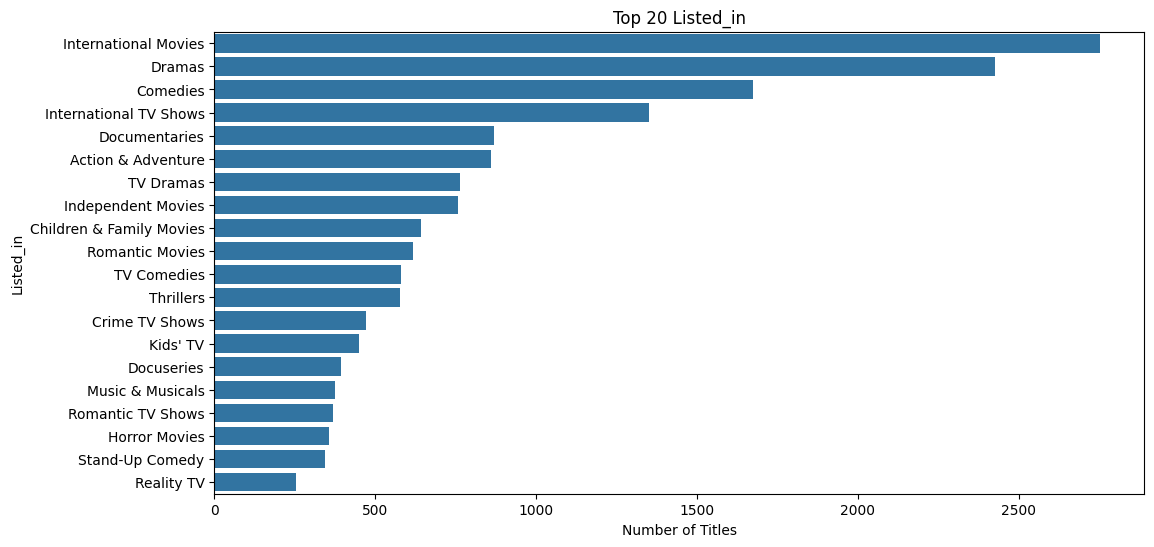

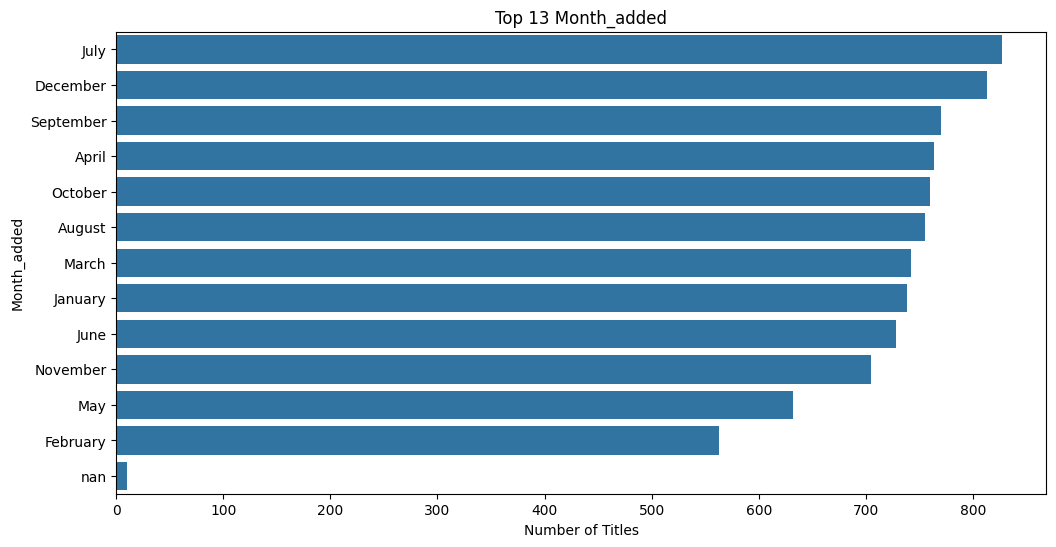

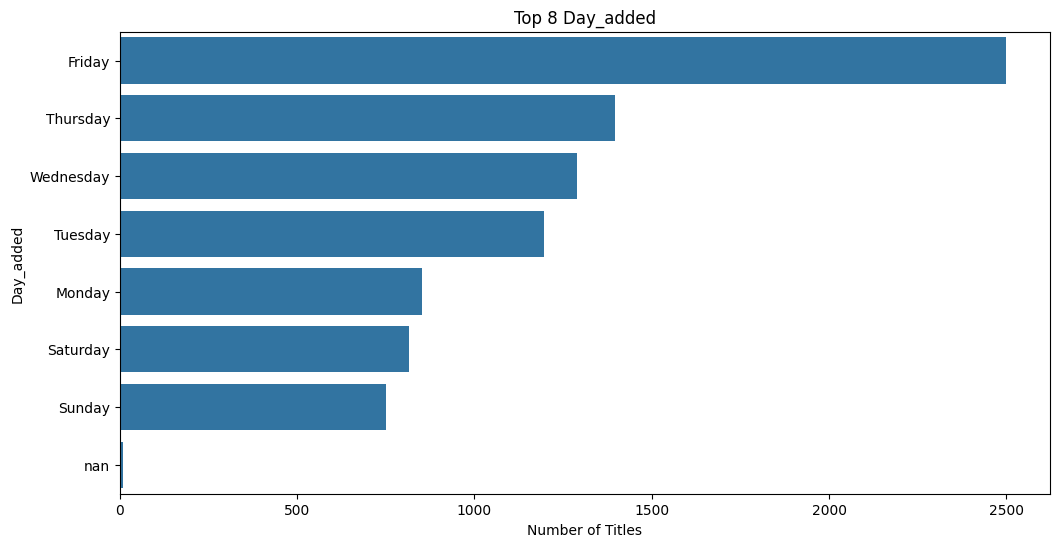

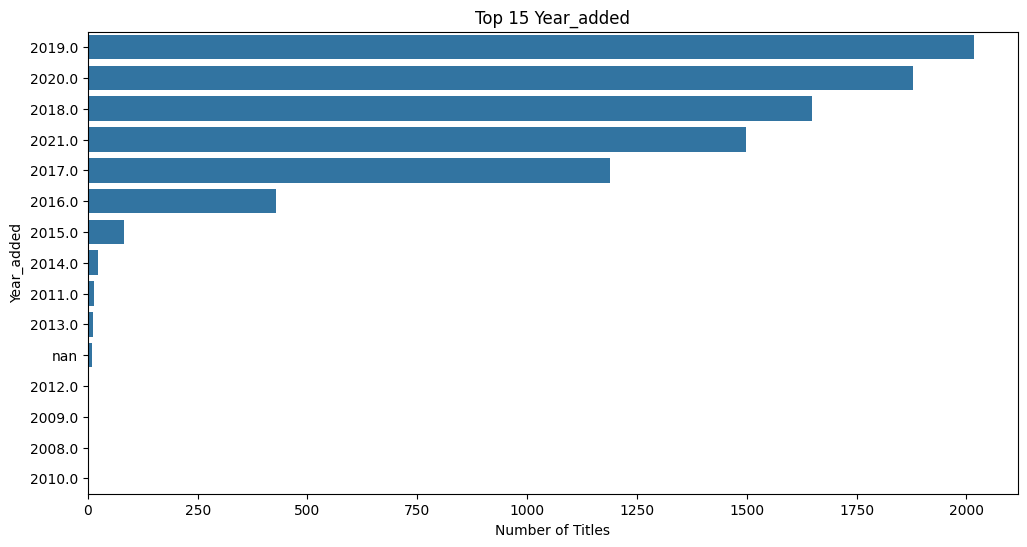

In [ ]:

for key, value in chat_dict.items():
  filtered_values = value[1][value[1].index != ('Not Specified' or 'Unknown')]
  plt.figure(figsize=(12,6))
  sns.barplot(x=filtered_values.values, y=filtered_values.index)
  plt.title(value[0])
  plt.xlabel('Number of Titles')
  plt.ylabel(key.capitalize())
  plt.show()


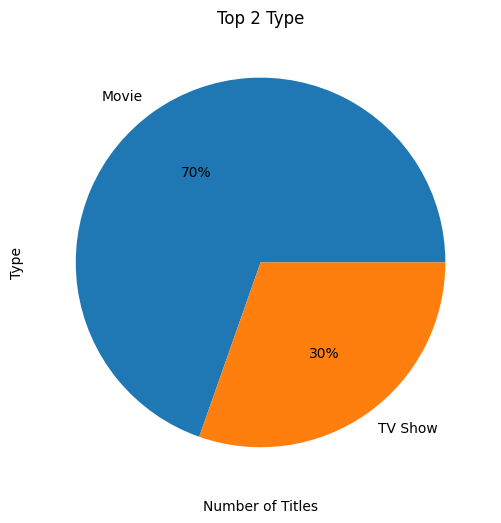

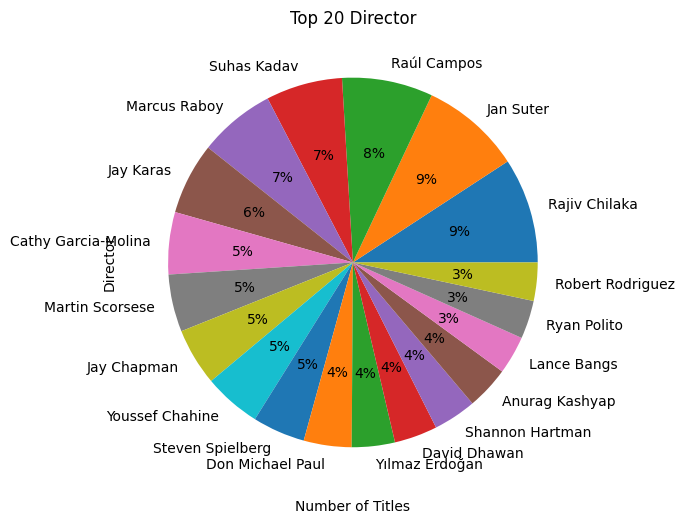

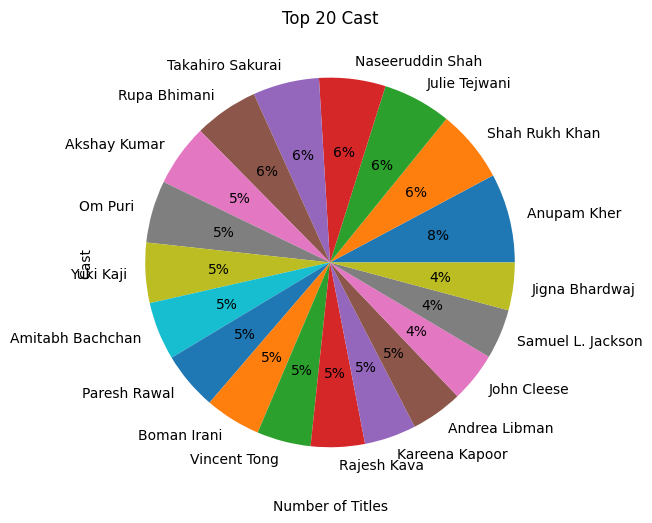

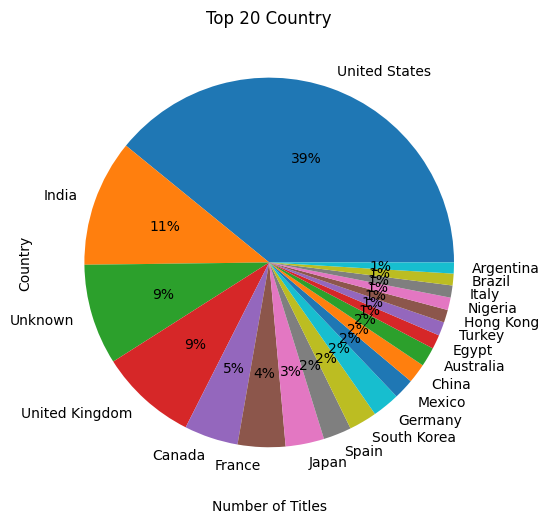

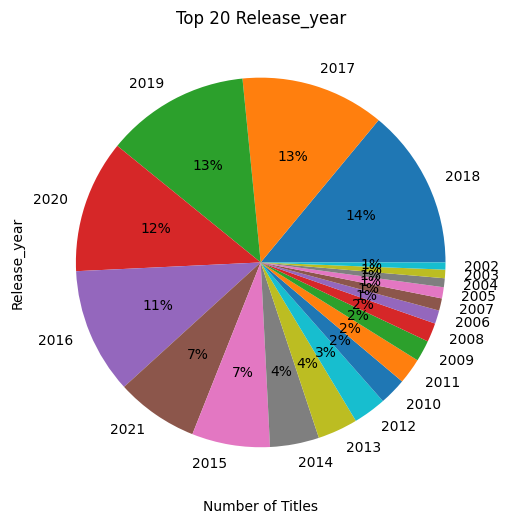

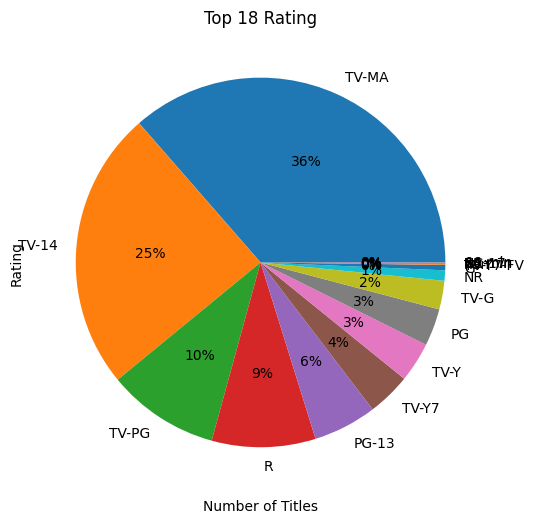

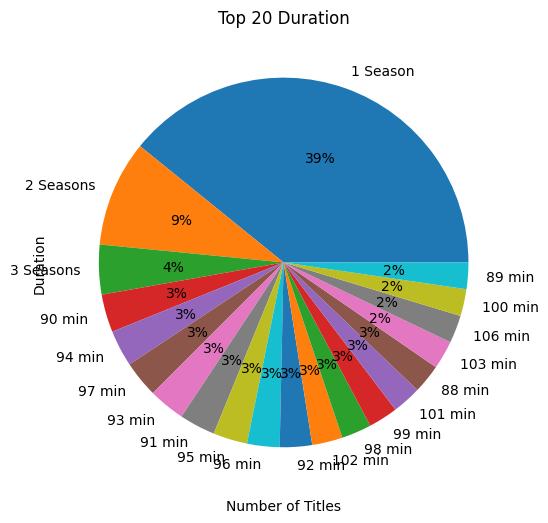

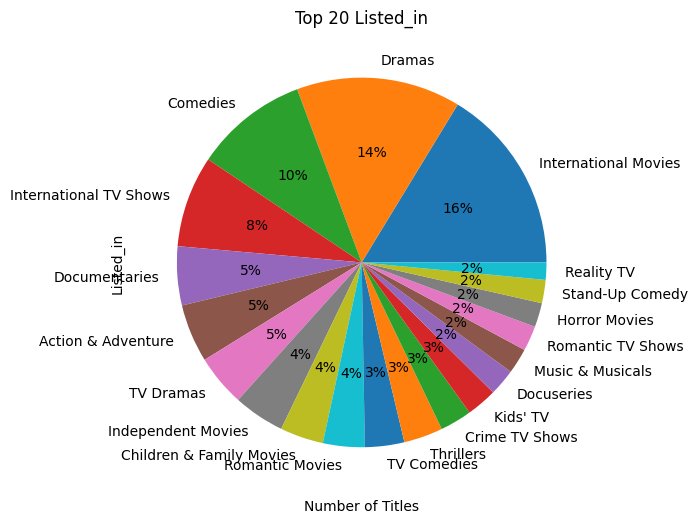

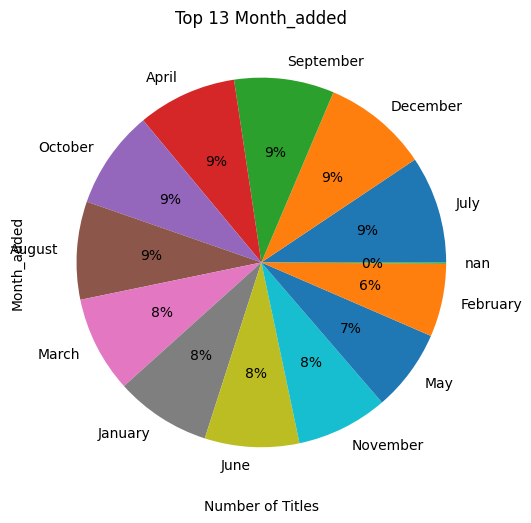

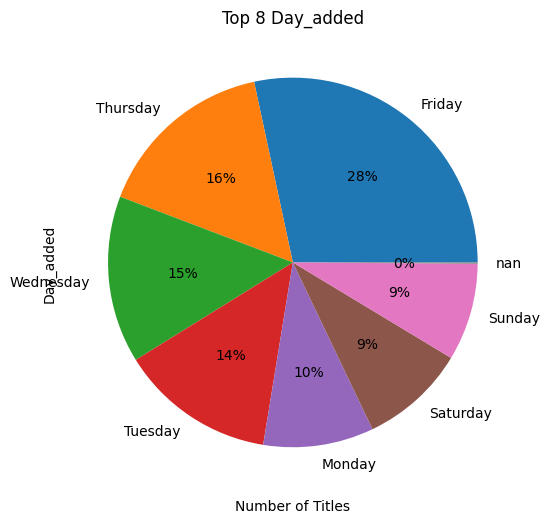

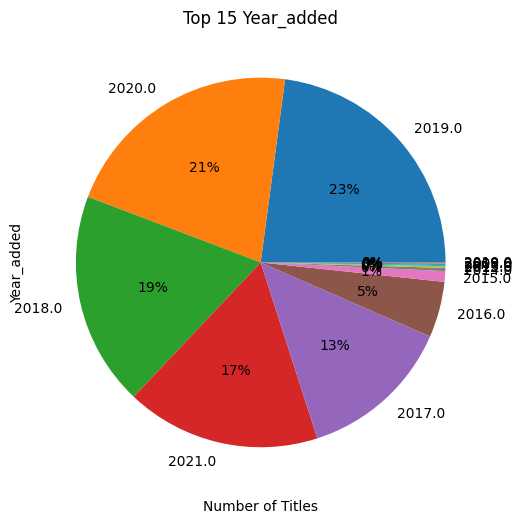

In [ ]:

for i,(key, value) in enumerate(chat_dict.items()):
  filtered_values = value[1][value[1].index != ('Not Specified' or 'Unknown')]
  plt.figure(figsize=(12,6))
  #plt.pie(x=filtered_values.values, y=filtered_values.index)
  plt.pie(filtered_values.values, labels = filtered_values.index,  autopct='%.0f%%')
  plt.title(value[0])
  plt.xlabel('Number of Titles')
  plt.ylabel(key.capitalize())
  plt.show()


# Line Plots

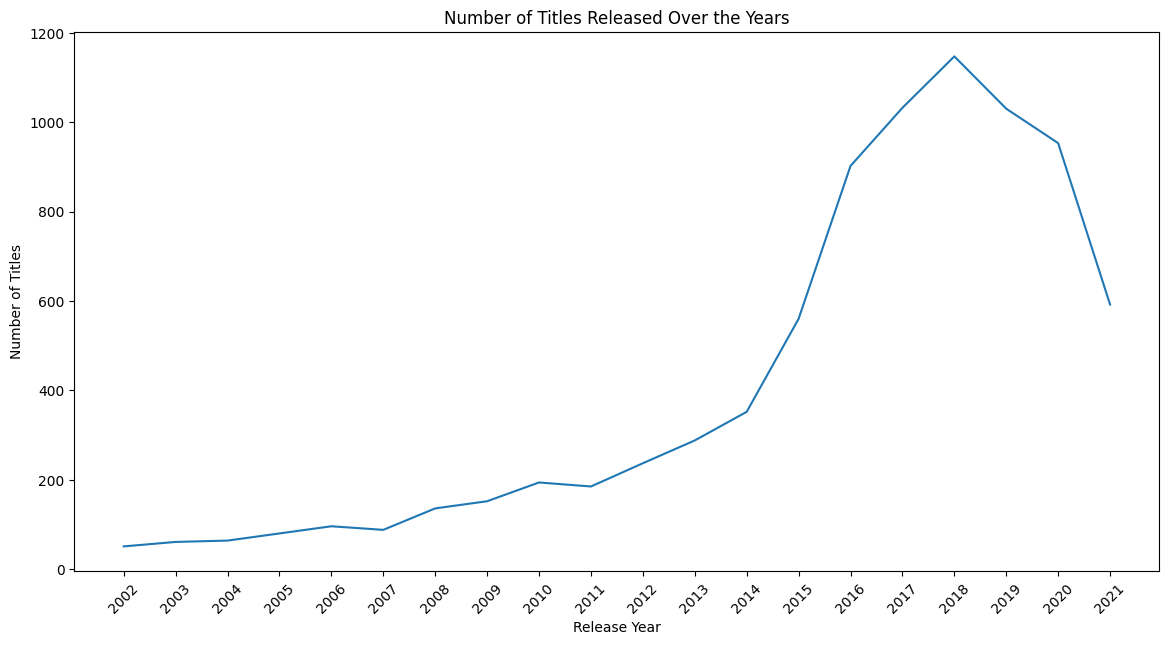

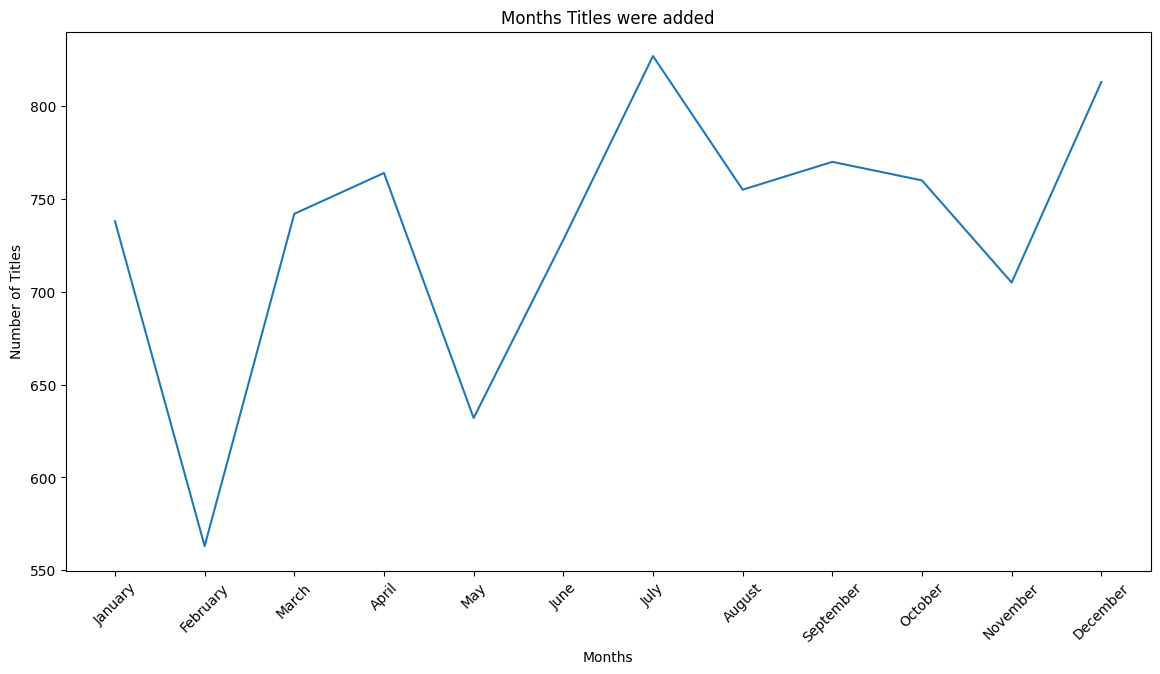

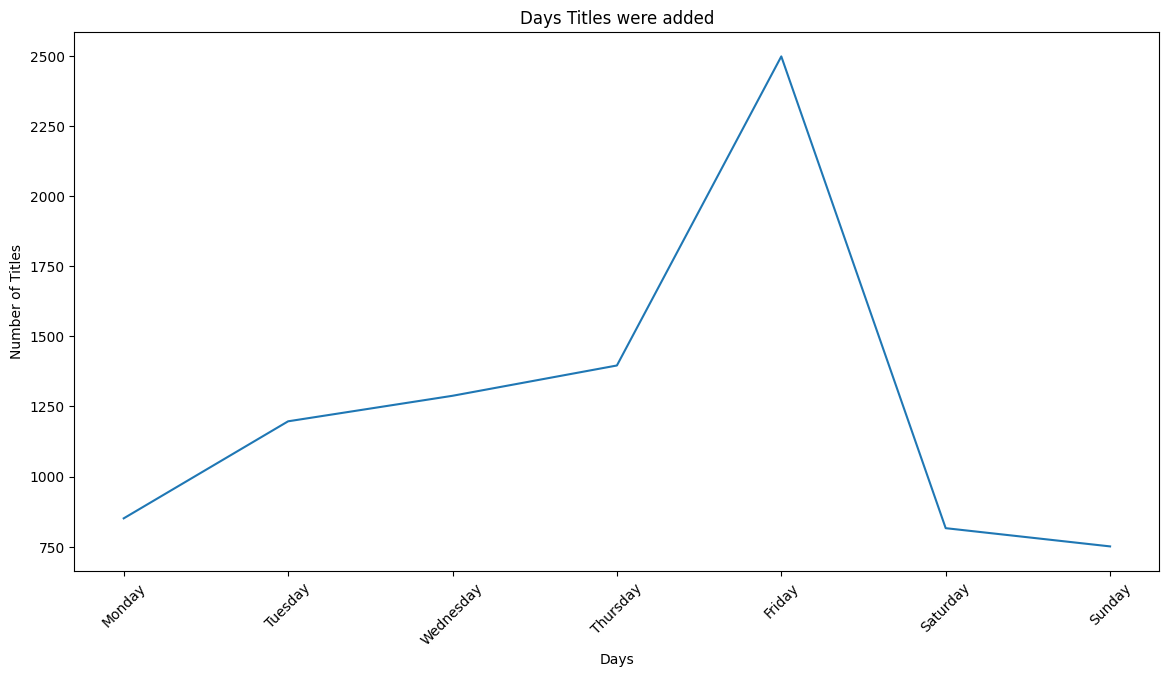

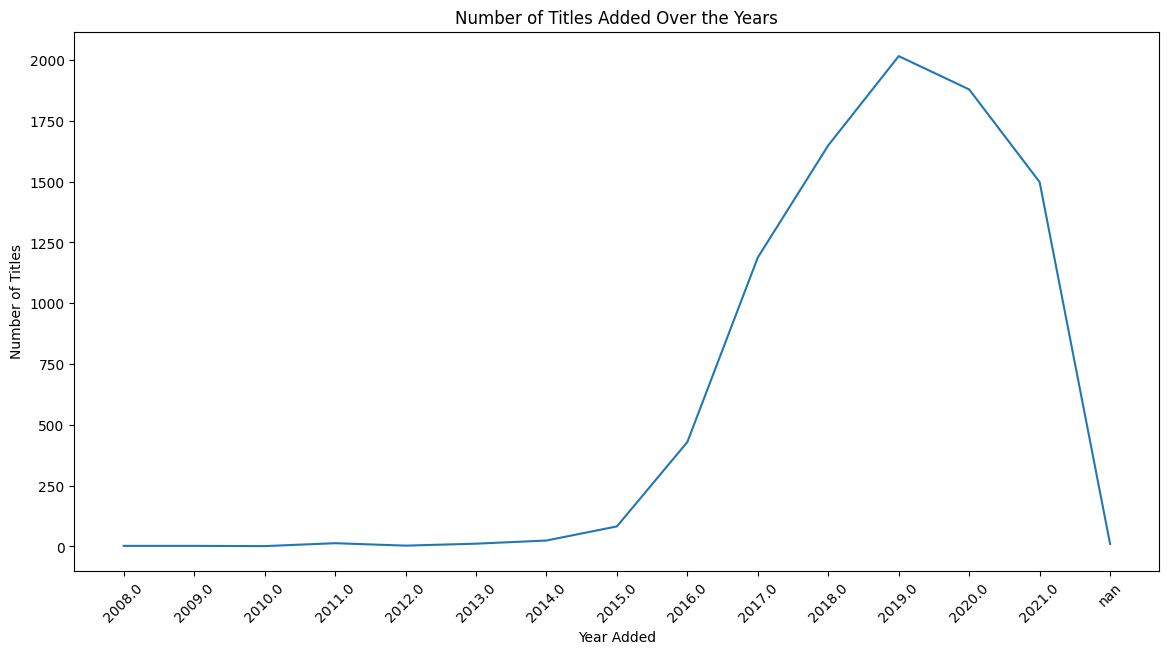

In [ ]:
# Correct order for months and days
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Dictionary for plotting
title_xlabel_ylabel_chat = {
    'release_year': ['Number of Titles Released Over the Years', 'Release Year', 'Number of Titles'],
    'month_added': ['Months Titles were added', 'Months', 'Number of Titles'],
    'day_added': ['Days Titles were added', 'Days', 'Number of Titles'],
    'year_added': ['Number of Titles Added Over the Years', 'Year Added', 'Number of Titles']
}

for key, values in title_xlabel_ylabel_chat.items():
    # Sort index for each key
    titles_per_year = qualitative_data_counts[key].sort_index()

    # Apply specific sorting for months or days if needed
    if key == 'month_added':
        titles_per_year.index = pd.Categorical(titles_per_year.index, categories=months_order, ordered=True)
        titles_per_year = titles_per_year.sort_index()  # Sort by the correct month order

    elif key == 'day_added':
        titles_per_year.index = pd.Categorical(titles_per_year.index, categories=days_order, ordered=True)
        titles_per_year = titles_per_year.sort_index()  # Sort by the correct day order

    # Plot the line chart
    plt.figure(figsize=(14,7))
    sns.lineplot(x=titles_per_year.index, y=titles_per_year.values)
    plt.title(values[0])
    plt.xlabel(values[1])
    plt.ylabel(values[2])
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability (optional)
    plt.show()


0
1
Skipping column 'director' because it contains lists.
2
Skipping column 'cast' because it contains lists.
3
Skipping column 'country' because it contains lists.
4
5
6
7
Skipping column 'listed_in' because it contains lists.
8
9
10
                  type  release_year    rating  duration  month_added  \
type          1.000000      0.184079  0.290270 -0.381413     0.003894   
release_year  0.184079      1.000000  0.252310 -0.005043    -0.020005   
rating        0.290270      0.252310  1.000000 -0.024212     0.010346   
duration     -0.381413     -0.005043 -0.024212  1.000000     0.004242   
month_added   0.003894     -0.020005  0.010346  0.004242     1.000000   
day_added    -0.063786     -0.076344 -0.080467  0.040469    -0.012583   
year_added    0.025102      0.110513 -0.063402 -0.073391    -0.049631   

              day_added  year_added  
type          -0.063786    0.025102  
release_year  -0.076344    0.110513  
rating        -0.080467   -0.063402  
duration       0.040469   -0

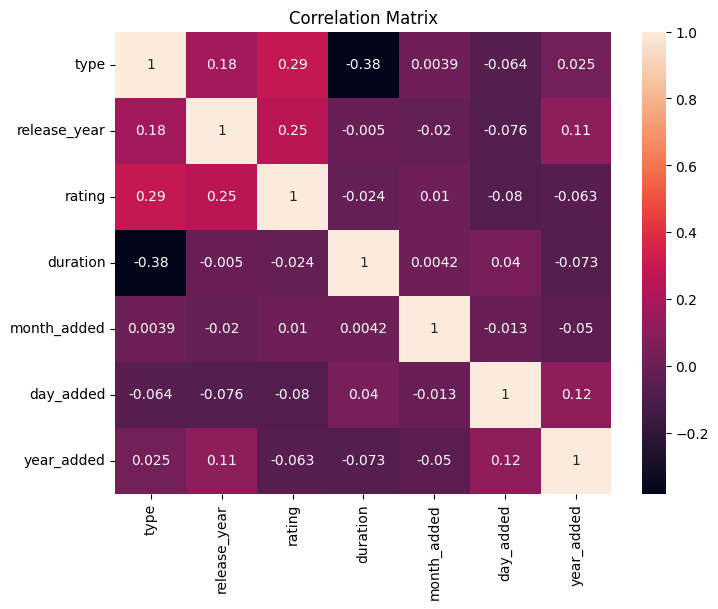

In [ ]:
# Encoding 'type' and 'rating'
qualitative_data_ = ['type', 'director', 'cast', 'country', 'release_year', 'rating', 'duration', 'listed_in',
                    'month_added', 'day_added', 'year_added', ]
df_encoded = df.copy()

qualitative_data_1 = []

for i in range (len(qualitative_data)):
  print(i)
  #if type(df_encoded[qualitative_data[i]]) == 'list':
  if df_encoded[qualitative_data[i]].apply(lambda x: isinstance(x, list)).any():
    print(f"Skipping column '{qualitative_data[i]}' because it contains lists.")
    #continue  # Skip to the next iteration
  else:
    df_encoded[qualitative_data[i]] = df_encoded[qualitative_data[i]].astype('category').cat.codes
    qualitative_data_1.append(qualitative_data[i])


#df_encoded['type_encoded'] = df_encoded['type'].astype('category').cat.codes
#df_encoded['rating_encoded'] = df_encoded['rating'].astype('category').cat.codes
#df_encoded['genre_encoded'] = df_encoded['listed_in'].astype('category').cat.codes

# Correlation matrix
#corr_matrix = df_encoded[['type_encoded', 'rating_encoded', 'release_year']].corr()
corr_matrix = df_encoded[qualitative_data_1].corr()
print(corr_matrix)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:

# Encoding 'type' and 'rating'
qualitative_data = ['type', 'director', 'cast', 'country', 'release_year', 'rating', 'duration', 'listed_in',
                    'month_added', 'day_added', 'year_added']
df_encoded = df.copy()

qualitative_data_1 = []

for column in qualitative_data:
    print(f"Processing column: {column}")

    # Check if the column contains lists
    if df_encoded[column].apply(lambda x: isinstance(x, list)).any():
        # Handle list columns (director, country, listed_in)
        print(f"Column '{column}' contains lists. Applying one-hot encoding.")

        # 1. Explode the list column into multiple rows
        exploded_df = df_encoded.explode(column)

        # 2. Create dummy variables (one-hot encoding)
        dummies = pd.get_dummies(exploded_df[column], prefix=column, prefix_sep='_')

        # 3. Aggregate dummy variables back to original rows
        aggregated_dummies = dummies.groupby(exploded_df.index).sum()

        # 4. Merge dummy variables with the original DataFrame
        df_encoded = pd.concat([df_encoded, aggregated_dummies], axis=1)

        # 5. Remove the original list column
        df_encoded.drop(columns=[column], inplace=True)

        # 6. Add dummy column names to qualitative_data_1
        qualitative_data_1.extend(aggregated_dummies.columns)

    else:
        # Handle non-list columns
        print(f"Column '{column}' does not contain lists. Encoding as category.")
        df_encoded[column] = df_encoded[column].astype('category').cat.codes
        qualitative_data_1.append(column)

# Correlation matrix
corr_matrix = df_encoded[qualitative_data_1].corr()
print(corr_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Processing column: type
Column 'type' does not contain lists. Encoding as category.
Processing column: director
Column 'director' contains lists. Applying one-hot encoding.
Processing column: cast
Column 'cast' contains lists. Applying one-hot encoding.


In [ ]:
df.describe(include=['O'])

In [ ]:
for i in df.columns:
    print(f"Number of unique values in {i} is {df[i].nunique()}")

for i in df.columns:
    print(f"Unique values in {i} are {df[i].unique()}")
#df.duplicated(subset=['brand'].sum())

In [ ]:
# Step 1: Fill NaN values with empty strings
df['country'] = df['country'].fillna('')

# Step 2: Ensure the 'country' column is split into lists (assuming countries are separated by commas)
df['country'] = df['country'].str.split(',')

# Step 3: Flatten the list of lists into a single list
all_countries = [country.strip() for sublist in df['country'] if isinstance(sublist, list) for country in sublist]

# Step 4: Find the unique countries
unique_countries = pd.Series(all_countries).unique()

# Print the unique countries
print(f"Unique countries are: {len(unique_countries)-1}")


In [ ]:
i = 'country'
try:
  #df['country'] = df['country'].str.split(',')
  # Fill NaN with empty strings before splitting
  df['country'] = df['country'].fillna('').str.split(',')
except:
  pass


In [ ]:
print(df[i])
#print(f"Unique values are {df[i].unique()}")
df[i] = df[i].apply(tuple)
unique_values = df[i].unique()
print(f"Unique values are {df[i].unique()}")

In [ ]:
missing_indices = df[df['rating'].isnull()].index.tolist()
print(f"Indices of missing values in 'rating' are: {missing_indices}")

Obsevation on missing data, since most of the data in the Netflix csv is the Nominal and Ordinal Catergory and they have meaning, filling missing values would be tricky, considering these have meaning and real world representation it would not be meaningfull to fill them with mean or mode values, but there might be an approach to fill date_added based on the release year, and rating can be filled based on details in listed_in, if listed_in has kids chances are the ratings would be kid friendly.

# Descriptive Statistics

In [ ]:
#Median Mode, Range
for i in df.columns[1:11]:
    if i != 'title1':
     #print(f"Mode of {i} is {df[i].mode()[0]}")
      print(f"{df[i].mode()[0]} is the most popular in {i}")
    else:
      print('Skipped Title')

print('\n')

for i in df.columns[1:11]:
      try:
        print(f"Median of {i} is {df[i].median()}")
      except TypeError:
        pass

In [ ]:
print(df.columns[1:12])

In [ ]:
df['month_year'].mode()
df['year'].mode()